# **Predicting Spotify's Popularity Score using Audio Features**
In this notebook, I will be using various regression and classification models to predict the popularity score of a Spotify song. This will be useful for an agency who is looking to sign an artist who auditioned with some tracks.

#### **Import necessary libraries**

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# **Regression Models to Predict the Numerical Popularity Score**

## **Overview of Datasets Used in Regression**
In this notebook, we have two main datasets for regression: the merged200k.csv dataset and the oversampled-using-SMOGN dataset. For fair comparison between the two dataset, <ins>**they must have the same test dataset**<ins>. 

In data-resampling.ipynb, we have split merged200k into train/test datasets: regression_training.csv and regression_test.csv. regression_training.csv was then oversampled using SMOGN, which is then saved as smogn.csv.

Let's first take a look at each of the 4 datasets (merged200k.csv, regression_training.csv, regression_test.csv, and smogn.csv).

In [2]:
# Convert csv to pandas dataframes
df = pd.read_csv("datasets/merged200k.csv")
regression_train = pd.read_csv("datasets/regression_training.csv")
regression_test = pd.read_csv("datasets/regression_test.csv")
df_smogn = pd.read_csv("datasets/smogn.csv")

In [3]:
# Select the relevant columns (audio features + track popularity)
relevant_columns = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo", "Track Popularity"]

df = df[relevant_columns]
regression_train = regression_train[relevant_columns]
regression_test = regression_test[relevant_columns]
df_smogn = df_smogn[relevant_columns]

In [4]:
df.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.550,0.545,-9.304,0.1630,0.3180,0.000000,0.0608,0.412,102.469,86
1,0.892,0.585,-7.269,0.1020,0.1460,0.000004,0.0881,0.244,104.011,38
2,0.568,0.788,-6.280,0.0377,0.0101,0.000000,0.1410,0.460,104.959,66
3,0.567,0.503,-6.119,0.1240,0.5810,0.000000,0.3690,0.184,72.798,59
4,0.668,0.392,-12.178,0.0585,0.7890,0.002750,0.3450,0.323,135.936,72


In [5]:
# Check the dataframe is converted and cleaned properly
regression_train.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.658,0.564,-5.290,0.2580,0.6070,0.000000,0.2330,0.2060,129.327,49
1,0.874,0.537,-7.791,0.2750,0.6860,0.000000,0.2230,0.5850,127.999,42
2,0.742,0.797,-4.130,0.0294,0.0851,0.000000,0.1680,0.9620,110.010,23
3,0.161,0.296,-17.388,0.0381,0.7090,0.917000,0.1110,0.0795,109.055,27
4,0.624,0.618,-5.586,0.1230,0.1020,0.000006,0.0853,0.8490,169.844,54


In [6]:
regression_test.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.297,0.269,-13.061,0.0435,0.9530,0.016700,0.0824,0.139,109.944,21
1,0.567,0.735,-7.296,0.0294,0.0368,0.000824,0.1490,0.509,126.857,44
2,0.564,0.772,-6.830,0.0503,0.2100,0.098000,0.4450,0.483,82.992,45
3,0.586,0.516,-13.337,0.0606,0.1500,0.000000,0.3690,0.894,124.719,29
4,0.653,0.730,-9.178,0.9240,0.8570,0.000000,0.7440,0.464,104.805,33


In [7]:
df_smogn.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Track Popularity
0,0.952148,0.508081,0.0,0.214181,0.030933,0.000003,0.134767,0.318293,127.980382,64.0
1,0.711043,0.569950,0.0,0.067448,0.219502,0.000118,0.109477,0.671248,127.352925,64.0
2,0.882083,0.534649,0.0,0.169485,0.090710,0.000042,0.129037,0.423782,127.916047,64.0
3,0.844087,0.655749,0.0,0.132732,0.099610,0.000063,0.080645,0.776822,126.369812,96.0
4,0.690495,0.528099,0.0,0.057958,0.340399,0.000038,0.057792,0.900279,128.224404,64.0


## **Comparing Which Dataset Performs Better in a <u>Linear Regression Model</u>**

Let's start with the <u>non-sampled</u> dataset (regression_train and regression_test). 

In [8]:
# Import sci-kit library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Predict track popularity score using <u>**linear regression**</u> in <u>non-sampled dataset</u>.

In [9]:
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Use the training dataset oversampled with SMOGN technique
y_train = pd.DataFrame(regression_train['Track Popularity'])   # Response
X_train = pd.DataFrame(regression_train[predictors]) # Predictor

# Use the same test dataset for fair comparison
y_test = pd.DataFrame(regression_test['Track Popularity'])   # Response
X_test = pd.DataFrame(regression_test[predictors]) # Predictor

# Linear Regression using Train Data
non_sampled_linreg = LinearRegression()    
non_sampled_linreg.fit(X_train, y_train)     

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', non_sampled_linreg.intercept_)
print('Coefficients of Regression \t: a = ', non_sampled_linreg.coef_)
print()

# Predict popularity values corresponding to predictors
y_train_pred = non_sampled_linreg.predict(X_train)
y_test_pred = non_sampled_linreg.predict(X_test)

# # Clip the predictions to be within the range [0, 100]
y_train_pred = np.clip(y_train_pred, 0, 100)
y_test_pred = np.clip(y_test_pred, 0, 100)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tNon-sampled Train Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tNon-sampled Test Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Intercept of Regression 	: b =  [47.62532813]
Coefficients of Regression 	: a =  [[ 1.85235912e+01 -5.73134331e+00  5.49284738e-01 -8.91905742e+00
  -8.56254508e+00 -2.23765663e+00 -7.88441228e+00 -1.02858822e+01
   2.23362828e-03]]

Goodness of Fit of Model 	Non-sampled Train Dataset
Explained Variance (R^2) 	: 0.18843542617207654
Mean Squared Error (MSE) 	: 225.87995945715446
Root Mean Squared Error (RMSE) 	: 15.029303359010173

Goodness of Fit of Model 	Non-sampled Test Dataset
Explained Variance (R^2) 	: 0.1893148961184673
Mean Squared Error (MSE) 	: 225.65586304026058
Root Mean Squared Error (RMSE) 	: 15.021846192804018



It seems that the R^2 score is on the lower end at around 0.20 from the maximum best score of 1.00. The RMSE is also moderately high at around 15. Let's see if the oversampled SMOGN dataset will perform better.

### Predict track popularity score using <u>**linear regression**</u> in <u>oversampled SMOGN dataset</u>.

In [10]:
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]

# Use the training dataset oversampled with SMOGN technique
smogn_y_train = pd.DataFrame(df_smogn['Track Popularity'])   # Response
smogn_X_train = pd.DataFrame(df_smogn[predictors]) # Predictor

# Use the same test dataset as normal linear regression for fair comparison
y_test = pd.DataFrame(regression_test['Track Popularity'])   # Response
X_test = pd.DataFrame(regression_test[predictors]) # Predictor

# Linear Regression using Train Data
smogn_linreg = LinearRegression()         
smogn_linreg.fit(smogn_X_train, smogn_y_train)  

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', smogn_linreg.intercept_)
print('Coefficients of Regression \t: a = ', smogn_linreg.coef_)
print()

# Predict popularity values corresponding to predictors
smogn_y_train_pred = smogn_linreg.predict(smogn_X_train)
smogn_y_test_pred = smogn_linreg.predict(X_test)

# # Clip the predictions to be within the range [0, 100]
smogn_y_train_pred = np.clip(smogn_y_train_pred, 0, 100)
smogn_y_test_pred = np.clip(smogn_y_test_pred, 0, 100)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(smogn_y_train, smogn_y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(smogn_y_train, smogn_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(smogn_y_train, smogn_y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(y_test, smogn_y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, smogn_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, smogn_y_test_pred)))
print()

Intercept of Regression 	: b =  [91.78545538]
Coefficients of Regression 	: a =  [[ 1.16460372e+01 -3.03563388e+01  2.87806346e+00 -4.43412509e+00
  -7.23128681e+00  3.26611288e+00 -8.59561034e+00 -6.08401315e+00
  -8.71718366e-03]]

Goodness of Fit of Model 	Train Dataset with SMOGN Sampling
Explained Variance (R^2) 	: 0.5153718695722371
Mean Squared Error (MSE) 	: 298.29597913909595
Root Mean Squared Error (RMSE) 	: 17.271247179607382

Goodness of Fit of Model 	Test Dataset with SMOGN Sampling
Explained Variance (R^2) 	: -0.16414818344349058
Mean Squared Error (MSE) 	: 324.04303691274066
Root Mean Squared Error (RMSE) 	: 18.00119543010243



Unfortunately, while the SMOGN dataset improves the R^2 score significantly for the training set, it worsens the score for the testing set. <ins>**This might be because the linear regression model is overfitted on the training set**<ins>.

SMOGN oversamples minority class to balance the dataset. As such, the model gives too much importance to the oversampled class. This skews the model's learning process, causing it to perform well on training data (including many repeated instances) but poorly on new test data that doesn't mirror the same repetitive pattern.

### Plot and compare the datasets' performance in a <u>**linear regression model**</u>

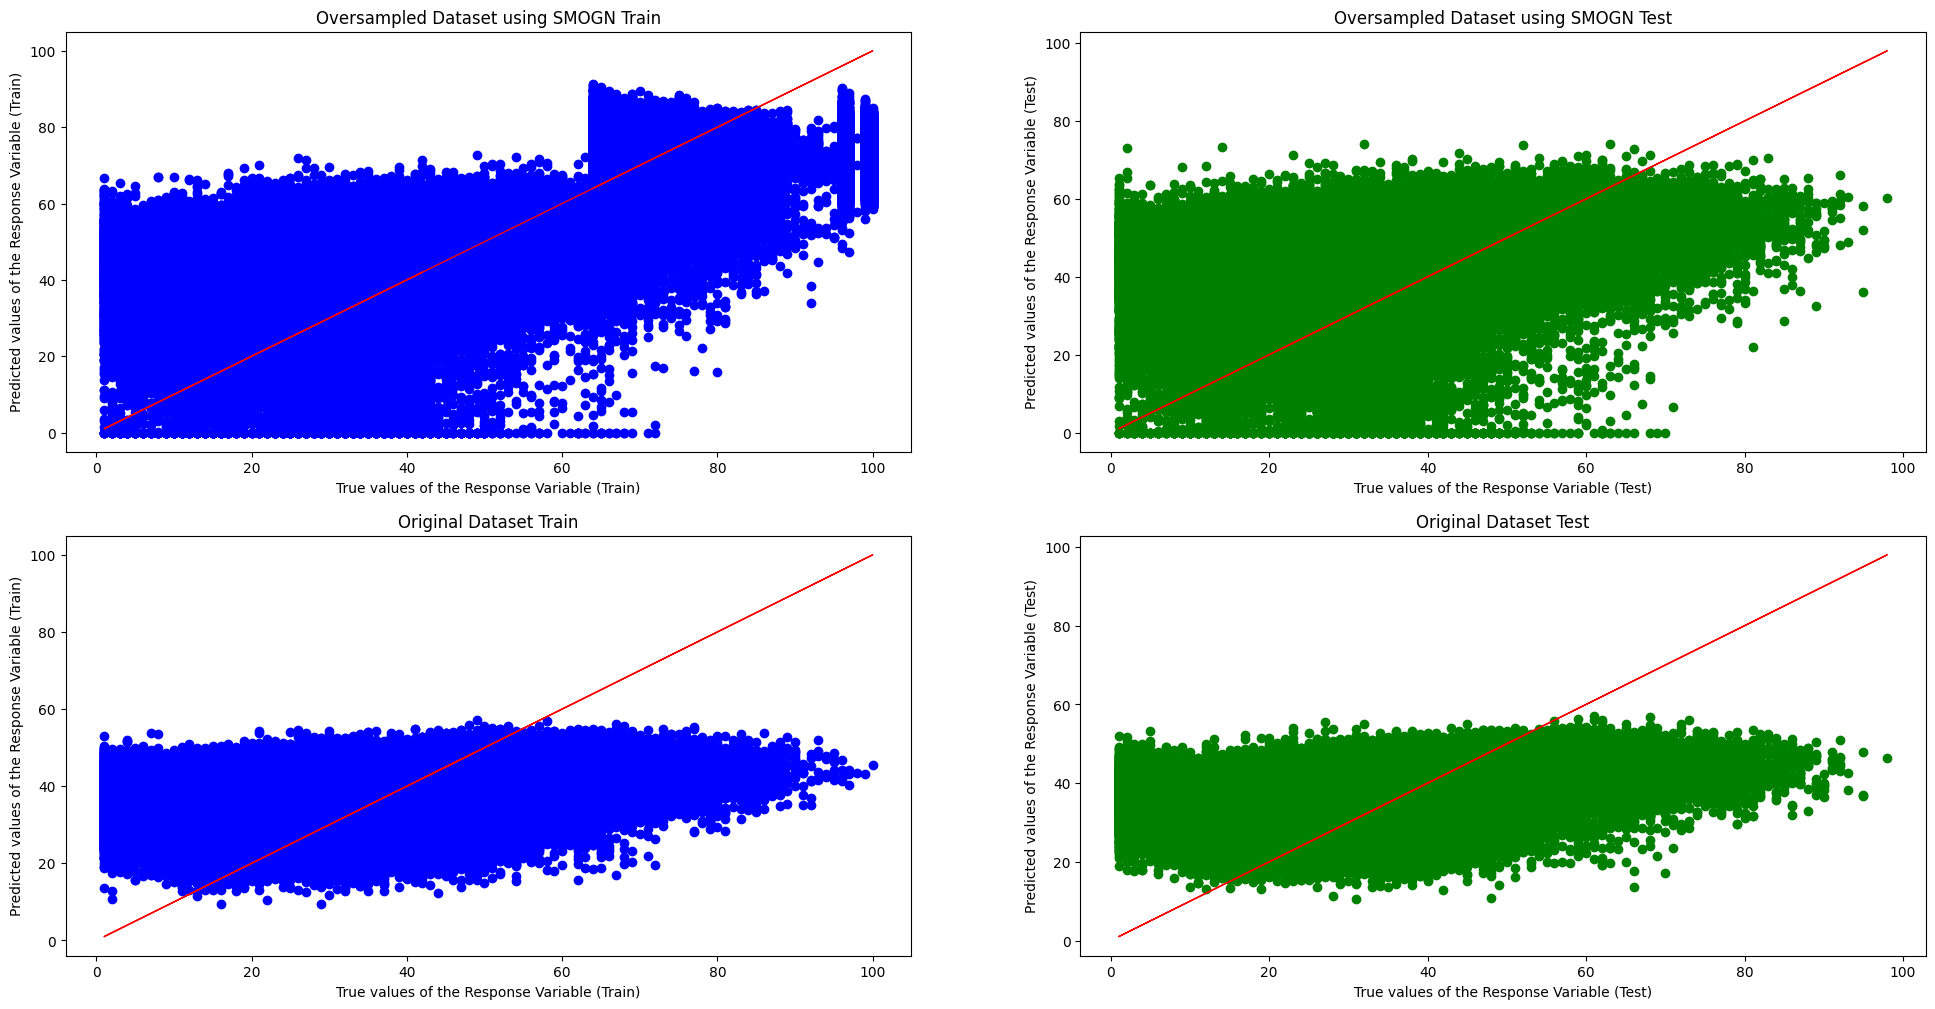

Goodness of Fit of Model 	Non-sampled Train Dataset
Explained Variance (R^2) 	: 0.18843542617207654
Mean Squared Error (MSE) 	: 225.87995945715446
Root Mean Squared Error (RMSE) 	: 15.029303359010173

Goodness of Fit of Model 	Non-sampled Test Dataset
Explained Variance (R^2) 	: 0.1893148961184673
Mean Squared Error (MSE) 	: 225.65586304026058
Root Mean Squared Error (RMSE) 	: 15.021846192804018

Goodness of Fit of Model 	Train Dataset with SMOGN Sampling
Explained Variance (R^2) 	: 0.5153718695722371
Mean Squared Error (MSE) 	: 298.29597913909595
Root Mean Squared Error (RMSE) 	: 17.271247179607382

Goodness of Fit of Model 	Test Dataset with SMOGN Sampling
Explained Variance (R^2) 	: -0.16414818344349058
Mean Squared Error (MSE) 	: 324.04303691274066
Root Mean Squared Error (RMSE) 	: 18.00119543010243



In [11]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(2, 2, figsize=(24, 12))
axes[0][0].scatter(smogn_y_train, smogn_y_train_pred, color = "blue")
axes[0][0].plot(smogn_y_train, smogn_y_train, 'r-', linewidth = 1)
axes[0][0].set_xlabel("True values of the Response Variable (Train)")
axes[0][0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0][1].scatter(y_test, smogn_y_test_pred, color = "green")
axes[0][1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[0][1].set_xlabel("True values of the Response Variable (Test)")
axes[0][1].set_ylabel("Predicted values of the Response Variable (Test)")

axes[1][0].scatter(y_train, y_train_pred, color = "blue")
axes[1][0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[1][0].set_xlabel("True values of the Response Variable (Train)")
axes[1][0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1][1].scatter(y_test, y_test_pred, color = "green")
axes[1][1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1][1].set_xlabel("True values of the Response Variable (Test)")
axes[1][1].set_ylabel("Predicted values of the Response Variable (Test)")

axes[0, 0].set_title("Oversampled Dataset using SMOGN Train")
axes[0, 1].set_title("Oversampled Dataset using SMOGN Test")
axes[1, 0].set_title("Original Dataset Train")
axes[1, 1].set_title("Original Dataset Test")

plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tNon-sampled Train Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tNon-sampled Test Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(smogn_y_train, smogn_y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(smogn_y_train, smogn_y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(smogn_y_train, smogn_y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset with SMOGN Sampling")
print("Explained Variance (R^2) \t:", r2_score(y_test, smogn_y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, smogn_y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, smogn_y_test_pred)))
print()

Let's stick with the <u>***non-sampled dataset (not sampled with SMOGN)***</u> and try various regression techniques to see which one has the best variance and lowest MSE

---

## **Fitting Different Regression Models on <u>Non-sampled Dataset</u>**

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# Initialize the models
models = {
    "Linear Regression": LinearRegression(), 
    "Ridge Regression": Ridge(alpha=1.0), # L2 regularization to prevent overfitting
    "Lasso Regression": Lasso(alpha=0.1), # L1 regularization to prevent overfitting
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
    "Extra Tree Regression": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    variance = r2_score(y_test, predictions)
    results[name] = mse, variance

# Display results
for name, metrics in results.items():
    print(f'{name}: MSE = {metrics[0]}')
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics[0]))
    print("Explained Variance (R^2) \t:", metrics[1])
    print()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression: MSE = 225.65586304026058
Root Mean Squared Error (RMSE) 	: 15.021846192804018
Explained Variance (R^2) 	: 0.1893148961184673

Ridge Regression: MSE = 225.656137694304
Root Mean Squared Error (RMSE) 	: 15.021855334621753
Explained Variance (R^2) 	: 0.18931390940383597

Lasso Regression: MSE = 227.70517549265537
Root Mean Squared Error (RMSE) 	: 15.0899030975237
Explained Variance (R^2) 	: 0.18195259205079517

Decision Tree: MSE = 213.00031080085577
Root Mean Squared Error (RMSE) 	: 14.59453016718441
Explained Variance (R^2) 	: 0.23478088819884846

Random Forest: MSE = 217.76571952051057
Root Mean Squared Error (RMSE) 	: 14.756887189394332
Explained Variance (R^2) 	: 0.21766081070171706

Gradient Boosting: MSE = 200.4712346809339
Root Mean Squared Error (RMSE) 	: 14.158786483344322
Explained Variance (R^2) 	: 0.27979250561916025

Extra Tree Regression: MSE = 202.24637781806436
Root Mean Squared Error (RMSE) 	: 14.221335303622665
Explained Variance (R^2) 	: 0.2734151747

From the above, <u>Gradient Boosting Regression</u> has the lowest RMSE value and the highest R^2 value, which suggest that it is the best regression model to predict popularity of track using voice analysis data.

To ensure that this model still works with other train/test splitting, 5-fold cross validation is employed, and the average R^2 value is taken.

In [13]:
from sklearn.model_selection import cross_val_score, KFold

# We use df as cross validation will split the dataset into different train/test datasets
# To ensure that the model generalises to different datasets
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
track_pop= pd.DataFrame(df['Track Popularity'])   # Response
voice_analysis = pd.DataFrame(df[predictors]) # Predictor

# Employ 5-fold cross validation here
# It takes a while to run (around 15 minutes)!
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
r2_scores = cross_val_score(model, voice_analysis, track_pop, scoring='r2', cv=kf)
mse_scores = cross_val_score(model, voice_analysis, track_pop, scoring='neg_mean_squared_error', cv=kf)

# Take the average
average_r2_score = np.mean(r2_scores)
average_mse_score = np.mean(mse_scores)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/Librar

In [14]:
print("Average R2 score: " + str(average_r2_score))
print("Average MSE score: " + str(average_mse_score * -1))

Average R2 score: 0.22775526321837086
Average MSE score: 261.31107500735914


Although the R2 score using Gradient Boost regression is improved compared to linear regression, the MSE is still very high. Therefore, the <ins> **regression model is inaccurate.**<ins>

We can improve the prediction by changing the label from a continuous numerical variable to a categorical variable, i.e. ‘Popular’ or ‘Not Popular’. We set tracks with popularity above 50 as ‘popular’ and tracks with popularity below 50 as ‘not popular’. 50 is chosen as the threshold as it aligns with the intuitive notion of 'popularity'. Mean and median are not used as a song with mean or median popularity may not necessarily be popular.

As such, we have converted the problem from a regression one to a classification one.

---

# **Using Classification Models to Predict Song Popularity**
## **Overview of Datasets Used in Classification**
In the data-resampling notebook, we have added a column on the merged200k dataset to indicate whether the song is popular or not. We have saved this updated merged200k dataset as merged200k_classification.csv.

In [15]:
# Let's import the csv file
df_classification = pd.read_csv("datasets/merged200k_classification.csv")

# Check the dataframe
df_classification.head()

,Unnamed: 0,Track Name,Artist Genres,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Track Popularity,track_id,Track Popularity Cat
0,0,act ii: date @ 8 (feat. Drake) - remix,NaN,0.550,0.545,0.0,-9.304,1.0,0.1630,0.3180,0.000000,0.0608,0.412,102.469,4.0,86,3QS9ZCtoSCJhmaJ7QNXSAS,1
1,1,LEAP!,NaN,0.892,0.585,11.0,-7.269,1.0,0.1020,0.1460,0.000004,0.0881,0.244,104.011,4.0,38,3vl2uH4D2QItFFhzz5L06g,0
2,2,Overdrive,"bedroom pop, pop, pov: indie",0.568,0.788,5.0,-6.280,1.0,0.0377,0.0101,0.000000,0.1410,0.460,104.959,4.0,66,3QyoC6OvQUmpQwQZ18iaTs,1
3,3,Raise y_our glass,NaN,0.567,0.503,8.0,-6.119,1.0,0.1240,0.5810,0.000000,0.3690,0.184,72.798,4.0,59,7j1vFohEm1lbsctYY9gyGd,1
4,4,In My Mind,gen z singer-songwriter,0.668,0.392,2.0,-12.178,0.0,0.0585,0.7890,0.002750,0.3450,0.323,135.936,3.0,72,2W779g2UrRZtVdf3FcEOO1,1


The data-resampling notebook also shows that the merged200k_classification.csv dataset has been split into train/test dataset (classification_training.csv + classification_test.csv). Due to imbalance of the dataset, the data-resampling notebook also resampled classification_training.csv using 4 different resampling methods to get smote.csv, rdmover.csv, rdmunder.csv and nearmiss.csv.

Again, for fair comparison between the datasets, we will use classification_test.csv as the common test dataset.

Let's seperate each training dataset into X_train and y_train.

In [16]:
# First convert each dataset from csv to pandas dataframe
classification_training = pd.read_csv("datasets/classification_training.csv")
smote = pd.read_csv("datasets/smote.csv")
rdmover = pd.read_csv("datasets/rdmover.csv")
rdmunder = pd.read_csv("datasets/rdmunder.csv")
nearmiss = pd.read_csv("datasets/nearmiss.csv")

In [17]:
# Let's split into X_train and y_train
predictors = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
              "Instrumentalness", "Liveness", "Valence", "Tempo"]
response = "Track Popularity Cat"

# Non-sampled training dataset
X_train = classification_training[predictors]
y_train = classification_training[response]

# Dataset oversampled using SMOTE
X_train_smote = smote[predictors]
y_train_smote = smote[response]

# Dataset oversampled by Random Oversampling
X_train_rdmover = rdmover[predictors]
y_train_rdmover = rdmover[response]

# Dataset undersampled by Random Undersampling
X_train_rdmunder = rdmunder[predictors]
y_train_rdmunder = rdmunder[response]

# Dataset undersampled by Nearmiss
X_train_nearmiss = nearmiss[predictors]
y_train_nearmiss = nearmiss[response]

In [18]:
# Now convert the testing data
classification_test = pd.read_csv("datasets/classification_test.csv")

In [19]:
# Split to X_test and y_test
X_test = classification_test[predictors]
y_test = classification_test[response]

## **Comparing Which Dataset Performs Best in a Logistic Regression Model**
Let's start with the <u>non-sampled classification_training</u> dataset.

In [20]:
# Import sci-kit library for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Predict track popularity category using <u>**logistic regression**</u> in <u>non-sampled</u> dataset

In [21]:
# Write a function to evaluate classification models
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model.__class__.__name__}: Accuracy = {accuracy:.4f}")
    print(classification_report(y_test, predictions))

# Non-sampled Dataset
print("Non-sampled Dataset")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train, y_train, X_test, y_test)
print()

Non-sampled Dataset


LogisticRegression: Accuracy = 0.7741
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     34828
           1       0.58      0.06      0.11     10392

    accuracy                           0.77     45220
   macro avg       0.68      0.52      0.49     45220
weighted avg       0.73      0.77      0.70     45220




While the accuracy is high, the recall score of positive value is abysmally low at 0.06, which means this model has a very high false negative rate. This is due to the imbalance in the classification_training dataset, where 78% of the dataset are non-popular songs (as explained in the data-resampling notebook).

As such, this model is more likely to predict negative instead of positive due to the overwhelmingly negative data points in the training dataset.

Now, let's try logistic regressions in the datasets that has been sampled such that there's equal amount of popular and non-popular songs.

### Predict track popularity category using <u>**logistic regression**</u> in <u>sampled</u> datasets

In [22]:
# Random Over Sampling
print("Random Over Sampling")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_rdmover, y_train_rdmover, X_test, y_test)
print()

# SMOTE
print("SMOTE")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_smote, y_train_smote, X_test, y_test)
print()

# Random Under Sampling
print("Random Under Sampling")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_rdmunder, y_train_rdmunder, X_test, y_test)
print()

# NearMiss
print("NearMiss")
train_evaluate(LogisticRegression(max_iter=1000, random_state=42), X_train_nearmiss, y_train_nearmiss, X_test, y_test)
print()

Random Over Sampling
LogisticRegression: Accuracy = 0.6027
              precision    recall  f1-score   support

           0       0.89      0.56      0.68     34828
           1       0.34      0.76      0.47     10392

    accuracy                           0.60     45220
   macro avg       0.61      0.66      0.58     45220
weighted avg       0.76      0.60      0.63     45220


SMOTE
LogisticRegression: Accuracy = 0.6102
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     34828
           1       0.34      0.74      0.47     10392

    accuracy                           0.61     45220
   macro avg       0.61      0.66      0.58     45220
weighted avg       0.76      0.61      0.64     45220


Random Under Sampling
LogisticRegression: Accuracy = 0.6027
              precision    recall  f1-score   support

           0       0.89      0.56      0.68     34828
           1       0.34      0.76      0.47     10392

    accuracy     

From the values above, the dataset sampled with <u>NearMiss</u> has the highest accuracy, but dataset sampled with SMOTE, Random Over Sampling and Random Under Sampling has significantly better positive recall (lower false negatives). However, all 4 sampled datasets perform better than the non-sampled dataset.

We shall proceed with fitting different classification models on all of the sampled datasets.

---

## **Fitting Different Classification Models on <u>Sampled Datasets</u>**

In [23]:
# Import different classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [24]:
# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000, random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# List of training datasets
train_sets = [
    ("Random Over Sampling", X_train_rdmover, y_train_rdmover),
    ("SMOTE", X_train_smote, y_train_smote),
    ("Random Under Sampling", X_train_rdmunder, y_train_rdmunder),
    ("NearMiss", X_train_nearmiss, y_train_nearmiss)
]

# Train and evaluate each model, but only print the classification report of the highest accuracy
def modified_train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, predictions

# This will take a while to run (around 5 mins)!
for train_set in train_sets:
    best_predictions = []
    best_accuracy = 0
    best_model = ""
    for model in models:
        accuracy, predictions = modified_train_evaluate(model, train_set[1], train_set[2], X_test, y_test)
        if accuracy > best_accuracy: 
            best_accuracy = accuracy
            best_predictions = predictions
            best_model = model.__class__.__name__
    print("For dataset: " + train_set[0])
    print("Best model is " + best_model)
    print(classification_report(y_test, best_predictions))

For dataset: Random Over Sampling
Best model is RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     34828
           1       0.49      0.31      0.38     10392

    accuracy                           0.77     45220
   macro avg       0.65      0.61      0.62     45220
weighted avg       0.74      0.77      0.75     45220

For dataset: SMOTE
Best model is RandomForestClassifier
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     34828
           1       0.39      0.55      0.45     10392

    accuracy                           0.70     45220
   macro avg       0.62      0.64      0.62     45220
weighted avg       0.74      0.70      0.71     45220

For dataset: Random Under Sampling
Best model is RandomForestClassifier
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     34828
           1       0.37      0.73     

Random Forest Classifier seems to have the highest accuracy as compared to the other classification models across the 4 sampled datasets.

Let's visualise how the sampled datasets perform using Random Forest Classifier in a confusion matrix.

### **Visualisation on Confusion Matrix**
Let's visualise both SMOTE dataset and Random Over Sampling dataset in a confusion matrix.

In [25]:
from sklearn.metrics import confusion_matrix

# Fit the Random Forest Classifier Model to each dataset
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train_smote, y_train_smote)
y_test_pred_smote = randomforest.predict(X_test)
randomforest.fit(X_train_rdmover, y_train_rdmover)
y_test_pred_rdmover = randomforest.predict(X_test)
randomforest.fit(X_train_rdmunder, y_train_rdmunder)
y_test_pred_rdmunder = randomforest.predict(X_test)
randomforest.fit(X_train_nearmiss, y_train_nearmiss)
y_test_pred_nearmiss = randomforest.predict(X_test)

# Make the confusion matrix
cm_rdmover = confusion_matrix(y_test, y_test_pred_rdmover)
cm_smote = confusion_matrix(y_test, y_test_pred_smote)
cm_rdmunder = confusion_matrix(y_test, y_test_pred_rdmunder)
cm_nearmiss = confusion_matrix(y_test, y_test_pred_nearmiss)

In [26]:
def calculate_rates(cm):
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)  # True Positive Rate
    TNR = TN / (TN + FP)  # True Negative Rate
    FPR = FP / (TN + FP)  # False Positive Rate
    FNR = FN / (TP + FN)  # False Negative Rate
    return TPR, TNR, FPR, FNR

rates1 = calculate_rates(cm_rdmover)
rates2 = calculate_rates(cm_smote)
rates3 = calculate_rates(cm_rdmunder)
rates4 = calculate_rates(cm_nearmiss)

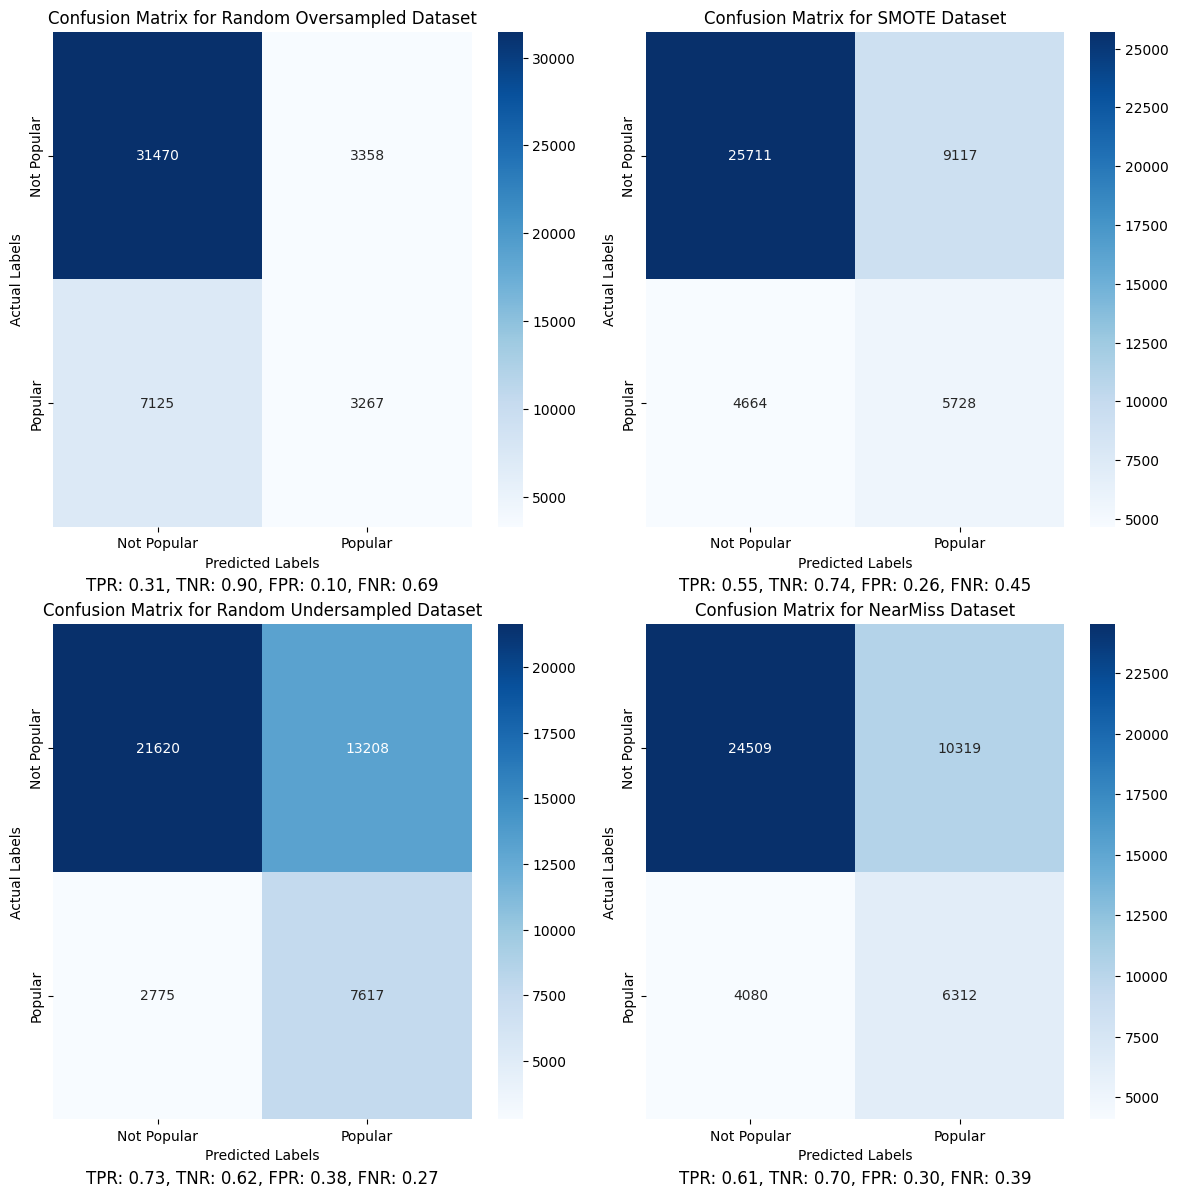

In [27]:
# Plotting confusion matrix
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 12))

# Random Oversampled Dataset
sb.heatmap(cm_rdmover, annot=True, ax=ax1, cmap='Blues', fmt='g')
ax1.set_title('Confusion Matrix for Random Oversampled Dataset')
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('Actual Labels')
ax1.set_xticklabels(['Not Popular', 'Popular'])
ax1.set_yticklabels(['Not Popular', 'Popular'])
ax1.text(0.5, -0.1, f'TPR: {rates1[0]:.2f}, TNR: {rates1[1]:.2f}, FPR: {rates1[2]:.2f}, FNR: {rates1[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax1.transAxes)

# SMOTE Dataset
sb.heatmap(cm_smote, annot=True, ax=ax2, cmap='Blues', fmt='g')
ax2.set_title('Confusion Matrix for SMOTE Dataset')
ax2.set_xlabel('Predicted Labels')
ax2.set_ylabel('Actual Labels')
ax2.set_xticklabels(['Not Popular', 'Popular'])
ax2.set_yticklabels(['Not Popular', 'Popular'])
ax2.text(0.5, -0.1, f'TPR: {rates2[0]:.2f}, TNR: {rates2[1]:.2f}, FPR: {rates2[2]:.2f}, FNR: {rates2[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax2.transAxes)

# Random Undersampled Dataset
sb.heatmap(cm_rdmunder, annot=True, ax=ax3, cmap='Blues', fmt='g')
ax3.set_title('Confusion Matrix for Random Undersampled Dataset')
ax3.set_xlabel('Predicted Labels')
ax3.set_ylabel('Actual Labels')
ax3.set_xticklabels(['Not Popular', 'Popular'])
ax3.set_yticklabels(['Not Popular', 'Popular'])
ax3.text(0.5, -0.1, f'TPR: {rates3[0]:.2f}, TNR: {rates3[1]:.2f}, FPR: {rates3[2]:.2f}, FNR: {rates3[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax3.transAxes)

# NearMiss Dataset
sb.heatmap(cm_nearmiss, annot=True, ax=ax4, cmap='Blues', fmt='g')
ax4.set_title('Confusion Matrix for NearMiss Dataset')
ax4.set_xlabel('Predicted Labels')
ax4.set_ylabel('Actual Labels')
ax4.set_xticklabels(['Not Popular', 'Popular'])
ax4.set_yticklabels(['Not Popular', 'Popular'])
ax4.text(0.5, -0.1, f'TPR: {rates4[0]:.2f}, TNR: {rates4[1]:.2f}, FPR: {rates4[2]:.2f}, FNR: {rates4[3]:.2f}', 
            size=12, ha='center', va='top', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

---

# **Conclusion**

Deciding between which model to use ultimately boils down to the aim of the agency. The model using Random Oversampled Dataset has the lowest true positive rate, but it has a **lower false negative rate**. This model might be useful for up-and-coming agency that does not have a lot of fund, and is unable to recoup the loss from signing an artist who's predicted to be popular, but ended up not making it.

Meanwhile, the model using Random Undersampled Dataset is more suitable for big agency who is looking to maximise exposure, as it is able to capture most popular tracks and artists (due to its high true positive rate), **at the expense of higher false negative rate**. However, as the big agency has the sufficient fiscal capabilities, it can take more risks and deal with the potential financial loss. 

For medium-sized agency, the model trained using SMOTE Dataset and NearMiss Dataset can be used, as both models are more conservative in detecting popular and non-popular songs, which reflect the moderate true positive and false negative rate as compared to the other models.